In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
from fitter import Fitter

warnings.filterwarnings("ignore", message="divide by zero encountered in log")
warnings.filterwarnings("ignore", message="invalid value encountered in divide")
warnings.filterwarnings("ignore", message="divide by zero encountered in divide")

In [52]:
df = pd.read_csv('Old_Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001666 entries, 0 to 2001665
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   status          object 
 1   bed             float64
 2   bath            float64
 3   acre_lot        float64
 4   city            object 
 5   state           object 
 6   zip_code        float64
 7   house_size      float64
 8   prev_sold_date  object 
 9   price           float64
dtypes: float64(6), object(4)
memory usage: 152.7+ MB


## Null Percentage:

In [53]:
nulls_percent = df.isnull().sum()*100 / df.shape[0]
print(nulls_percent.round(3))

status             0.000
bed               16.914
bath              17.122
acre_lot          20.921
city               0.015
state              0.000
zip_code           0.026
house_size        32.233
prev_sold_date    49.691
price              0.014
dtype: float64


## Correlation:

In [54]:
for i in df.columns[:9] :
    if df[i].dtype != "object":
        print("Correlation between",i, "and the label \"price\": ", round(df[i].corr(df["price"])*100,2))

Correlation between bed and the label "price":  16.01
Correlation between bath and the label "price":  27.79
Correlation between acre_lot and the label "price":  -0.1
Correlation between zip_code and the label "price":  -7.42
Correlation between house_size and the label "price":  14.15


## Fixing Data Types

In [55]:
df["bed"] = df["bed"].convert_dtypes(int)
df["bath"] = df["bath"].convert_dtypes(int)
df["zip_code"] = df["zip_code"].convert_dtypes(int)

df['zip_code'] = df['zip_code'].astype(str).fillna('')
df['zip_code'] = df['zip_code'].apply(lambda x: x.zfill(5))  

df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3,2,0.12,Adjuntas,Puerto Rico,00601,920.0,NaN,105000.0
1,for_sale,4,2,0.08,Adjuntas,Puerto Rico,00601,1527.0,NaN,80000.0
2,for_sale,2,1,0.15,Juana Diaz,Puerto Rico,00795,748.0,NaN,67000.0
3,for_sale,4,2,0.10,Ponce,Puerto Rico,00731,1800.0,NaN,145000.0
4,for_sale,6,2,0.05,Mayaguez,Puerto Rico,00680,NaN,NaN,65000.0


## Zip_Code

In [56]:
df['zip_code'] = df['zip_code'].str[3:]
df['zip_code'] = df['zip_code'].replace("A>", "100")
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3,2,0.12,Adjuntas,Puerto Rico,01,920.0,NaN,105000.0
1,for_sale,4,2,0.08,Adjuntas,Puerto Rico,01,1527.0,NaN,80000.0
2,for_sale,2,1,0.15,Juana Diaz,Puerto Rico,95,748.0,NaN,67000.0
3,for_sale,4,2,0.10,Ponce,Puerto Rico,31,1800.0,NaN,145000.0
4,for_sale,6,2,0.05,Mayaguez,Puerto Rico,80,NaN,NaN,65000.0


## Prev_Sold_Date


In [57]:
df['sold'] = df['prev_sold_date'].notnull().map({True: 'yes', False: 'no'})
df.drop(["prev_sold_date"], axis=1, inplace=True)
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,price,sold
0,for_sale,3,2,0.12,Adjuntas,Puerto Rico,01,920.0,105000.0,no
1,for_sale,4,2,0.08,Adjuntas,Puerto Rico,01,1527.0,80000.0,no
2,for_sale,2,1,0.15,Juana Diaz,Puerto Rico,95,748.0,67000.0,no
3,for_sale,4,2,0.10,Ponce,Puerto Rico,31,1800.0,145000.0,no
4,for_sale,6,2,0.05,Mayaguez,Puerto Rico,80,NaN,65000.0,no


## Handling the NULLs

In [58]:
df.dropna(subset=["price"], axis = 0, inplace=True)
df.drop(df[df["price"] <= 1000].index, axis = 0, inplace=True)

n_bins = 50
quantiles = df['price'].quantile(np.linspace(0, 1, n_bins + 1)[1:])
min_price = df['price'].min() 

bins = quantiles.tolist()
bins.insert(0, min_price)

price_categories = pd.cut(df['price'], bins=bins, include_lowest=True)
df['price_category'] = price_categories

price_category_bed_means = df.groupby('price_category')['bed'].mean().astype(int)
price_category_bath_means = df.groupby('price_category')['bath'].mean().astype(int)
price_category_size_means = df.groupby('price_category')['house_size'].mean()
price_category_acre_means = df.groupby('price_category')['acre_lot'].mean()


/var/folders/j9/nrpllg2s5fx8xthz6hx8jr6h0000gn/T/ipykernel_6124/2902909643.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_category_bed_means = df.groupby('price_category')['bed'].mean().astype(int)
/var/folders/j9/nrpllg2s5fx8xthz6hx8jr6h0000gn/T/ipykernel_6124/2902909643.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_category_bath_means = df.groupby('price_category')['bath'].mean().astype(int)
/var/folders/j9/nrpllg2s5fx8xthz6hx8jr6h0000gn/T/ipykernel_6124/2902909643.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pa

In [59]:
def fill_bed(row):
    category = row['price_category']
    if pd.isna(row['bed']):
      return price_category_bed_means.loc[category]
    else:
      return row['bed']

df["bed"] = df.apply(fill_bed, axis=1)

def fill_bath(row):
    category = row['price_category']
    if pd.isna(row['bath']):
      return price_category_bath_means.loc[category]
    else:
      return row['bath']
    
df["bath"] = df.apply(fill_bath, axis=1)


In [60]:
n_bins = 10

bins2 = [1,2,3,4,5,6,10,15,25,142]
bed_categories = pd.cut(df['bed'], bins=bins2, include_lowest=True)
df['bed_category'] = bed_categories

bed_category_size_means = df.groupby('bed_category')['house_size'].mean()
bed_category_acre_means = df.groupby('bed_category')['acre_lot'].mean()

bins3 = [1,2,3,4,5,6,10,15,25,198]
bath_categories = pd.cut(df['bath'], bins=bins3, include_lowest=True)
df['bath_category'] = bath_categories

bath_category_size_means = df.groupby('bath_category')['house_size'].mean()
bath_category_acre_means = df.groupby('bath_category')['acre_lot'].mean()

/var/folders/j9/nrpllg2s5fx8xthz6hx8jr6h0000gn/T/ipykernel_6124/2538763947.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bed_category_size_means = df.groupby('bed_category')['house_size'].mean()
/var/folders/j9/nrpllg2s5fx8xthz6hx8jr6h0000gn/T/ipykernel_6124/2538763947.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bed_category_acre_means = df.groupby('bed_category')['acre_lot'].mean()
/var/folders/j9/nrpllg2s5fx8xthz6hx8jr6h0000gn/T/ipykernel_6124/2538763947.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=Fa

In [61]:
def fill_house_size(row):
    category1 = row['price_category']
    category2 = row['bed_category']
    category3 = row['bath_category']
    if pd.isna(row['house_size']):
      return (price_category_size_means.loc[category1] + bed_category_size_means.loc[category2] + bath_category_size_means.loc[category3])/3
    else:
      return row['house_size']

df["house_size"] = df.apply(fill_house_size, axis=1)

def fill_acre_lot(row):
    category1 = row['price_category']
    category2 = row['bed_category']
    category3 = row['bath_category']
    if pd.isna(row['acre_lot']):
      return (price_category_acre_means.loc[category1] + bed_category_acre_means.loc[category2] + bath_category_acre_means.loc[category3])/3
    else:
      return row['acre_lot']
    
df["acre_lot"] = df.apply(fill_acre_lot, axis=1)

df.drop(["price_category"], axis=1, inplace=True)
df.drop(["bed_category"], axis=1, inplace=True)
df.drop(["bath_category"], axis=1, inplace=True)

In [62]:
nulls_percent = df.isnull().sum()*100 / df.shape[0]
print(nulls_percent.round(3))

status        0.000
bed           0.000
bath          0.000
acre_lot      0.000
city          0.012
state         0.000
zip_code      0.000
house_size    0.000
price         0.000
sold          0.000
dtype: float64


## Outliers
Scatter Plots

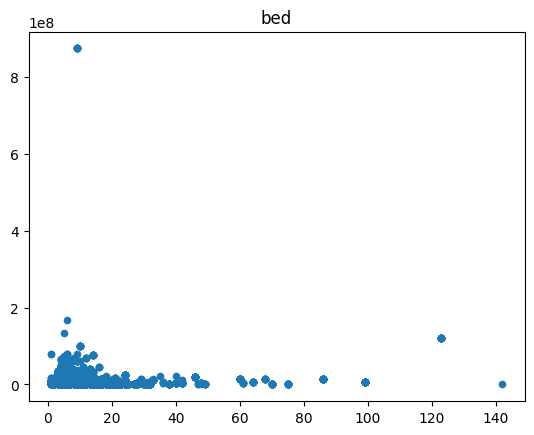

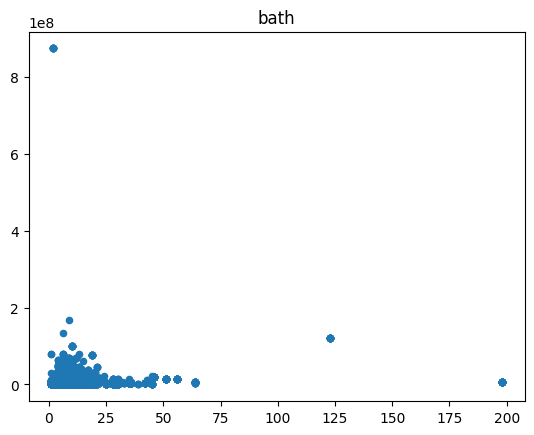

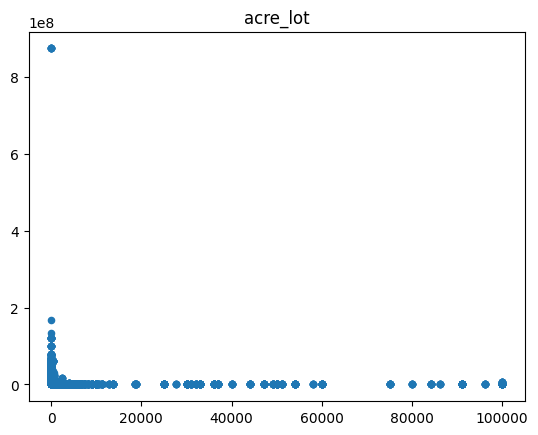

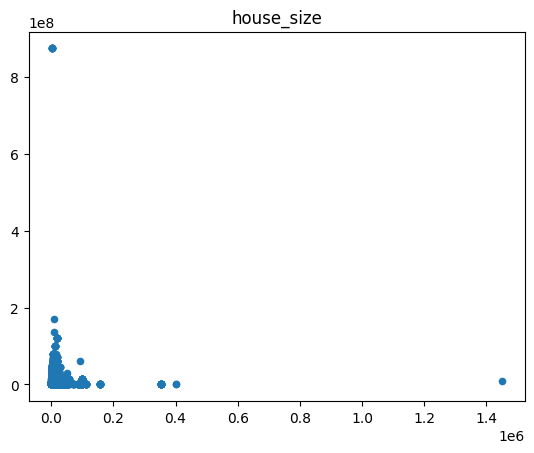

In [63]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df.drop(["price"], axis=1, inplace=True)

for i in numeric_df.columns:
    plt.scatter(numeric_df[i], df["price"], s = 20)
    plt.title(i)
    plt.show()

Box Plots

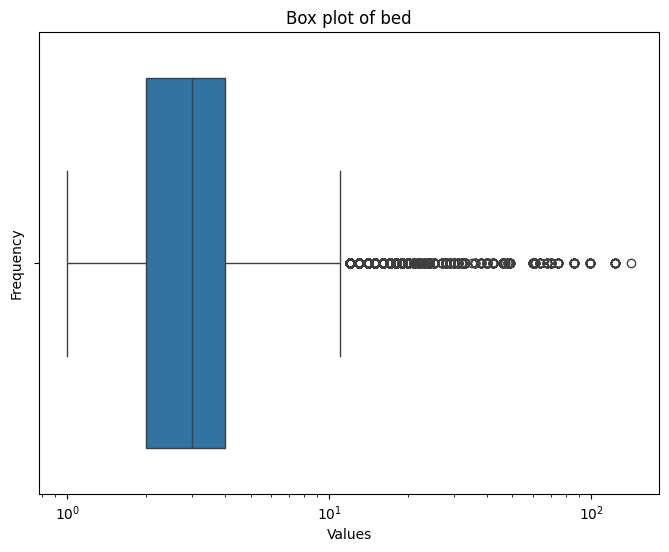

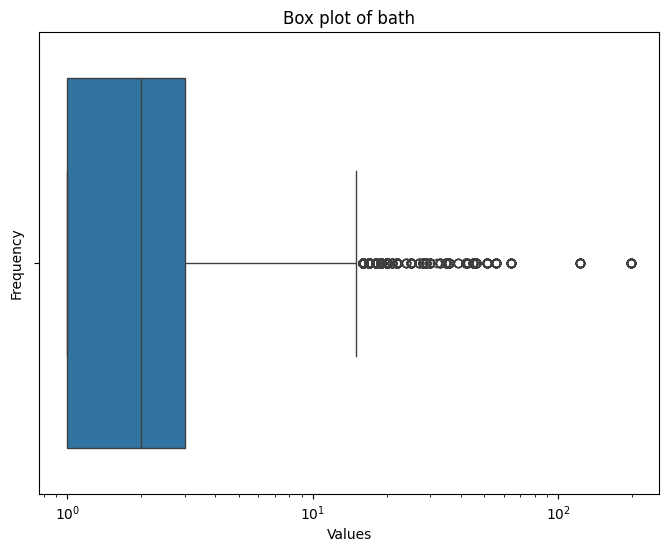

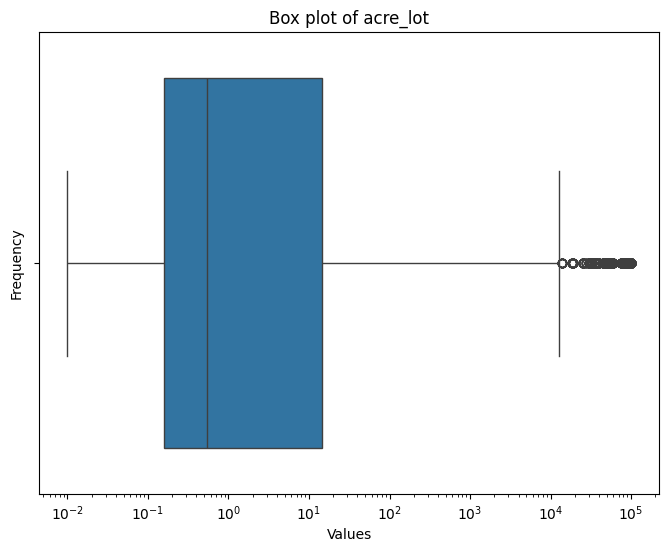

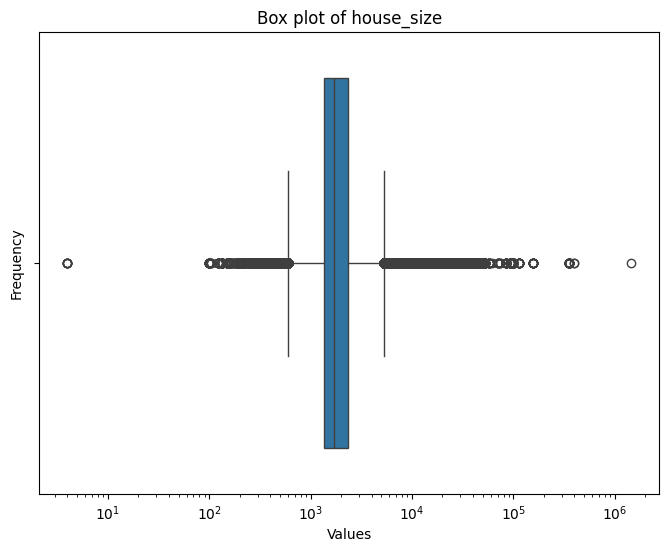

In [64]:
for column in numeric_df.columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=numeric_df[column], log_scale=True, orient='h')
    plt.title(f'Box plot of {column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()

Interquartile range

In [65]:
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
outlier = (numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))
print(IQR)
print()
print("- Outlier lower bound:")
print(Q1- 1.5 * IQR)
print()
print("- Outlier upper bound:")
print(Q3 + 1.5 * IQR)

print()
print("- Number of outliers:")
for i in numeric_df.columns:
    print(i, ":", outlier[i].sum())
print()
print("- Percentage of outliers:")
for i in numeric_df.columns:
    print(i, ":", (outlier[i].sum()*100/len(outlier[i])))

bed             2.000000
bath            2.000000
acre_lot       14.520000
house_size    991.019802
dtype: float64

- Outlier lower bound:
bed            -1.000000
bath           -2.000000
acre_lot      -21.620000
house_size   -126.549505
dtype: float64

- Outlier upper bound:
bed              7.000000
bath             6.000000
acre_lot        36.460000
house_size    3837.529703
dtype: float64

- Number of outliers:
bed : 40459
bath : 28886
acre_lot : 94517
house_size : 127057

- Percentage of outliers:
bed : 2.0224706744501555
bath : 1.4439577820056646
acre_lot : 4.724730238933373
house_size : 6.351344731298682


## Distribution

- Statistical Overview
                bed          bath      acre_lot    house_size
count  2.000474e+06  2.000474e+06  2.000474e+06  2.000474e+06
mean   3.249542e+00  2.247585e+00  2.750167e+01  2.069703e+03
std    1.763459e+00  1.641510e+00  1.080834e+03  2.525766e+03
min    1.000000e+00  1.000000e+00  0.000000e+00  4.000000e+00
25%    2.000000e+00  1.000000e+00  1.600000e-01  1.359980e+03
50%    3.000000e+00  2.000000e+00  5.400000e-01  1.685000e+03
75%    4.000000e+00  3.000000e+00  1.468000e+01  2.351000e+03
max    1.420000e+02  1.980000e+02  1.000000e+05  1.450112e+06

- Mean
bed              3.249542
bath             2.247585
acre_lot        27.501666
house_size    2069.703326
dtype: float64

- Median
bed              3.00
bath             2.00
acre_lot         0.54
house_size    1685.00
dtype: float64

- Mode
   bed  bath  acre_lot   house_size
0    3     2      0.06  1347.713992

- Standard Deviation
bed              1.763459
bath             1.641510
acre_lot      1080.833863

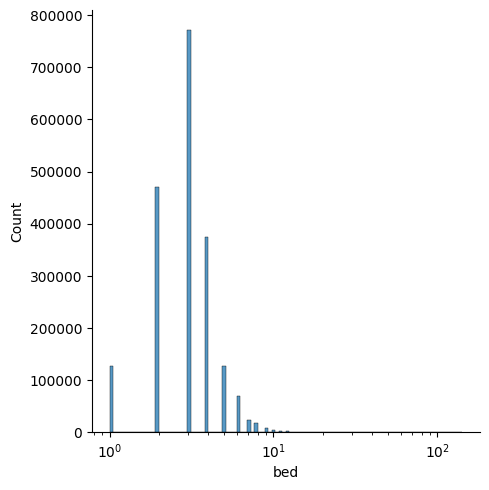

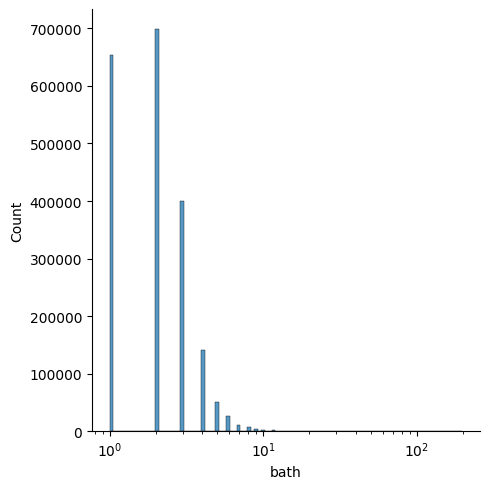

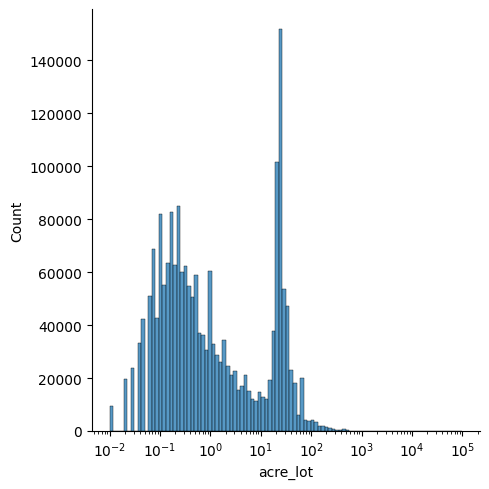

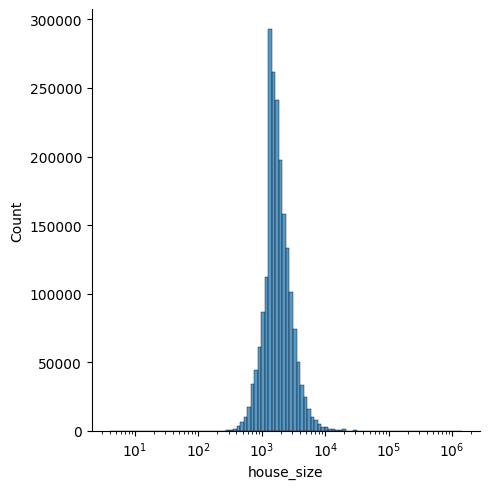

In [66]:
print("- Statistical Overview")
print(numeric_df.describe())
print()
print("- Mean")
print(numeric_df.mean())
print()
print("- Median")
print(numeric_df.median())
print()
print("- Mode")
print(numeric_df.mode())
print()
print("- Standard Deviation")
print(numeric_df.std())
print()
print("- Skewness")
print(numeric_df.skew())

for i in numeric_df.columns:
  sns.displot(data=numeric_df, x=i, bins=100, log_scale=True)

In [67]:
def get_best_distribution():
    numeric_columns = ['bed', 'bath',"acre_lot",  'house_size']

    columns_distributions_dict = {column: "" for column in numeric_columns}

    for column in numeric_columns:
        print("###### " + column + " ######")

        data = numeric_df[column].values

        f = Fitter(data,distributions=["beta", "gamma", "lognorm", "norm", "uniform"])
        f.fit()
        f.summary(plot=False)
        dist = f.get_best(method="sumsquare_error")
        best_dist = ""
        for key in dist.keys():
            best_dist = key

        columns_distributions_dict[column] = str(best_dist)
        print(column)
        print(f"Best Distribution: {best_dist}")
        print()

    return columns_distributions_dict

get_best_distribution()

###### bed ######


2024-03-11 06:58:57.184 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.146776)
2024-03-11 06:58:57.202 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.007771)
2024-03-11 06:59:00.551 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.003227)
2024-03-11 06:59:26.947 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED beta distribution (taking more than 30 seconds)
2024-03-11 06:59:26.948 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED gamma distribution (taking more than 30 seconds)


bed
Best Distribution: lognorm

###### bath ######


2024-03-11 06:59:27.392 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.134604)
2024-03-11 06:59:27.403 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.010723)
2024-03-11 06:59:34.805 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.122806)
2024-03-11 06:59:57.047 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED beta distribution (taking more than 30 seconds)
2024-03-11 06:59:57.048 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED gamma distribution (taking more than 30 seconds)


bath
Best Distribution: norm

###### acre_lot ######


2024-03-11 06:59:57.539 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=1e-06)
2024-03-11 06:59:57.553 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.0)
2024-03-11 07:00:27.177 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED lognorm distribution (taking more than 30 seconds)
2024-03-11 07:00:27.178 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED gamma distribution (taking more than 30 seconds)
2024-03-11 07:00:27.178 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED beta distribution (taking more than 30 seconds)


acre_lot
Best Distribution: norm

###### house_size ######


2024-03-11 07:00:27.849 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.0)
2024-03-11 07:00:27.852 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.0)
2024-03-11 07:00:29.701 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.0)
2024-03-11 07:00:57.376 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED gamma distribution (taking more than 30 seconds)
2024-03-11 07:00:57.376 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED beta distribution (taking more than 30 seconds)


house_size
Best Distribution: norm


{'bed': 'lognorm', 'bath': 'norm', 'acre_lot': 'norm', 'house_size': 'norm'}

## Scaling

In [68]:
scaler = StandardScaler()
columns = ['bath', 'acre_lot', 'house_size']
numeric_df = pd.DataFrame(scaler.fit_transform(numeric_df[columns]), columns=columns)

numeric_df["bed"] = np.log10(df["bed"])

df["bed"] = numeric_df['bed']
df["bath"] = numeric_df['bath']
df["house_size"] = numeric_df['house_size']
df["acre_lot"] = numeric_df['acre_lot']

df.head(10)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,price,sold
0,for_sale,0.477121,-0.150828,-0.025334,Adjuntas,Puerto Rico,01,-0.455190,105000.0,no
1,for_sale,0.602060,-0.150828,-0.025371,Adjuntas,Puerto Rico,01,-0.214867,80000.0,no
2,for_sale,0.301030,-0.760023,-0.025306,Juana Diaz,Puerto Rico,95,-0.523288,67000.0,no
3,for_sale,0.602060,-0.150828,-0.025352,Ponce,Puerto Rico,31,-0.106781,145000.0,no
4,for_sale,0.778151,-0.150828,-0.025399,Mayaguez,Puerto Rico,80,0.094957,65000.0,no
5,for_sale,0.602060,0.458368,-0.025019,San Sebastian,Puerto Rico,12,0.178281,179000.0,no
6,for_sale,0.477121,-0.760023,-0.025260,Ciales,Puerto Rico,39,-0.011760,50000.0,no
7,for_sale,0.477121,-0.150828,-0.025371,Ponce,Puerto Rico,31,-0.403721,71600.0,no
8,for_sale,0.301030,-0.760023,-0.025362,Ponce,Puerto Rico,30,-0.387092,100000.0,no
9,for_sale,0.698970,0.458368,-0.018543,Las Marias,Puerto Rico,70,1.319718,300000.0,no


In [69]:
numeric_df.describe()

,bath,acre_lot,house_size,bed
count,2.000474e+06,2.000474e+06,2.000474e+06,1.999282e+06
mean,-1.585556e-16,8.879680e-19,3.081178e-16,4.679245e-01
std,1.000000e+00,1.000000e+00,1.000000e+00,1.946049e-01
min,-7.600232e-01,-2.544487e-02,-8.178525e-01,0.000000e+00
25%,-7.600232e-01,-2.529683e-02,-2.809933e-01,3.010300e-01
50%,-1.508278e-01,-2.494525e-02,-1.523116e-01,4.771213e-01
75%,4.583675e-01,-1.186276e-02,1.113709e-01,6.020600e-01
max,1.192515e+02,9.249574e+01,5.733084e+02,2.152288e+00


## One-Hot Encoding

In [70]:
print("Num of status: ",len(df["status"].unique()))
print("Num of cities: ",len(df["city"].unique()))
print("Num of states: ",len(df["state"].unique()))
print("Num of zipcodes: ",len(df["zip_code"].unique()))
print("Num of sold: ",len(df["sold"].unique()))

Num of status:  2
Num of cities:  5000
Num of states:  24
Num of zipcodes:  101
Num of sold:  2


In [72]:
OHE = OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype=int).set_output(transform='pandas')
cols = ["city", "state", "zip_code", "status", "sold"]
NewDF = OHE.fit_transform(df[cols])
print(NewDF)

         city_Aaronsburg  city_Abbot  city_Abbottstown  city_Aberdeen  \
0                      0           0                 0              0   
1                      0           0                 0              0   
2                      0           0                 0              0   
3                      0           0                 0              0   
4                      0           0                 0              0   
...                  ...         ...               ...            ...   
2001661                0           0                 0              0   
2001662                0           0                 0              0   
2001663                0           0                 0              0   
2001664                0           0                 0              0   
2001665                0           0                 0              0   

         city_Abingdon  city_Abington  city_Absecon  city_Absecon Highlands  \
0                    0              0       

## Finalizing the Dataframe

In [75]:
NewDF['bed'] = df['bed']
NewDF['bath'] = df['bath']
NewDF['acre_lot'] = df['acre_lot']
NewDF['house_size'] = df['house_size']
NewDF['price'] = df['price']

NewDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000474 entries, 0 to 2001665
Columns: 5134 entries, city_Aaronsburg to price
dtypes: float64(5), int64(5129)
memory usage: 76.6 GB


In [76]:
NewDF.to_csv('Cleaned_Dataset.csv', index=False)